# Prime Numbers

#### Lewis Dean



## What is a prime number?

> A prime number is a natural number greater than 1 that is not a product of two smaller natural numbers. 
>
> -- Wikipeida

## Basic Timed Example

Below is a small program that lists the prime numbers up to 100, with the time taken. 1 is not a prime number, so we start at 2.

In [1]:
import timeit
import time

In [2]:
def genPrimes():
    primes = []
    def isPrime(n):
        for i in range(2, n):
            if (n % i) == 0:
                break
        else: 
            return True
        return False

    for number in range (2,101):
        if isPrime(number):
            primes.append(number)
    return primes
print(genPrimes())

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [3]:
timeBasic = timeit.timeit(
    globals=globals(),  # access the global variables in this scope
    stmt='[genPrimes()]',
    number=10000,
    timer=time.perf_counter
) * 1e+6 / 1000 # convert to average time in microseconds
print(f'Took {timeBasic} microseconds')

Took 883.5011089999999 microseconds


## Making Improvements

Any multiples of 2 (other than 2 itself) are not prime numbers. So we can skip checking them. 
We can pass a `step` value to `range` of 2, and by starting on an odd number we will always skip even ones.

In [4]:
def genPrimes():
    primes = []
    def isPrime(n):
        for i in range(3, n, 2):
            if (n % i) == 0:
                break
        else: 
            return True
        return False

    for number in range (3,101, 2):
        if isPrime(number):
            primes.append(number)
    return primes
print(genPrimes())

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [5]:
timeSkipEvens = timeit.timeit(
    globals=globals(),  # access the global variables in this scope
    stmt='[genPrimes()]',
    number=10000,
    timer=time.perf_counter
) * 1e+6 / 1000 # convert to average time in microseconds
print(f'Took {timeSkipEvens} microseconds')

Took 424.28610900000007 microseconds


## Further Improvements

A prime number is never made up of two factors greater than the square root of the prime. This means we only need to check up to the square root of the number being tested.

In [6]:
import math

In [7]:
def genPrimes():
    primes = []
    def isPrime(n):
        for i in range(3, int(math.sqrt(n)+1), 2):
            if (n % i) == 0:
                break
        else: 
            return True
        return False

    for number in range (3,101, 2):
        if isPrime(number):
            primes.append(number)
    return primes
print(genPrimes())

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [8]:
timeSquareRoot = timeit.timeit(
    globals=globals(),  # access the global variables in this scope
    stmt='[genPrimes()]',
    number=10000,
    timer=time.perf_counter
) * 1e+6 / 1000 # convert to average time in microseconds
print(f'Took {timeSquareRoot} microseconds')

Took 343.41073500000016 microseconds


## Comparing the speeds

Calculating just 100 prime numbers can lead to some large boudaries in timings, however when repeated using timeit, the speed difference between the methods is more apparent.

<AxesSubplot:xlabel='Method', ylabel='Time taken (microseconds)'>

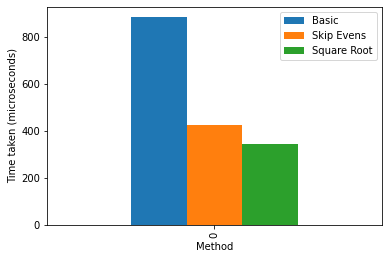

In [9]:
import pandas as pd
df = pd.DataFrame({
    'Basic': [timeBasic],
    'Skip Evens': [timeSkipEvens],
    'Square Root': [timeSquareRoot],
})

df.plot.bar(xlabel="Method", ylabel="Time taken (microseconds)")